In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,8)
import os

In [42]:
stats_dir="/home/mare398/ADNI_Freesurfer_EDA/"

# Loading Data

In [43]:
foldernames=[x for x in os.listdir("/home/mare398/batch_output") if x.endswith(".nii")]  


In [44]:
foldernames[0]

'ADNI_041_S_0446_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20070806155716141_S24824_I65167.nii'

In [45]:
#RID identifies patient
demographic_data=pd.read_csv("PTDEMOG.csv", usecols=['ID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2', 'USERDATE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY'])
demographic_data=demographic_data.drop_duplicates(subset=['RID'], keep='first')
demographic_data['PTDOBYY'] = demographic_data['PTDOBYY'].astype('int64')
demographic_data['PTDOBMM'] = demographic_data['PTDOBMM'].astype('int64')

demographic_data

,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,PTGENDER,PTDOBMM,PTDOBYY
0,18,2,107,sc,sc,2005-08-17,1.0,4,1931
1,20,1,10,f,f,2005-08-18,2.0,12,1944
2,22,3,107,sc,sc,2005-08-18,1.0,5,1924
3,24,4,10,sc,sc,2005-08-18,1.0,1,1938
4,26,5,107,sc,sc,2005-08-23,1.0,12,1931
...,...,...,...,...,...,...,...,...,...
4632,123455,6893,54,sc,sc,2020-11-16,1.0,6,1948
4633,124088,6895,55,sc,sc,2020-11-27,1.0,7,1935
4634,125608,6896,16,sc,sc,2021-01-04,1.0,3,1956
4635,125764,6897,26,sc,sc,2021-01-07,1.0,2,1955


In [46]:
lh_thickness=pd.read_csv(os.path.join(stats_dir, "aparc_stats_lh_thickness.csv"))
rh_thickness=pd.read_csv(os.path.join(stats_dir, "aparc_stats_rh_thickness.csv"))
vols=pd.read_csv(os.path.join(stats_dir, "aseg_stats_volume.csv"))
#Bash commands to get these files:
# aparcstats2table --subjectsfile=/pghbio/dbmi/batmanlab/mare398/ADNI_Freesurfer_EDA/subject_names.csv --hemi lh --meas thickness -d comma --tablefile /pghbio/dbmi/batmanlab/mare398/ADNI_Freesurfer_EDA/aparc_stats_lh_thickness.csv --skip

# asegstats2table --subjects $(cat /pghbio/dbmi/batmanlab/mare398/ADNI_Freesurfer_EDA/subject_names.csv | tr '\n' ' ') --meas volume --tablefile /pghbio/dbmi/batmanlab/mare398/ADNI_Freesurfer_EDA/aseg_stats_volume.csv --delimiter comma --skip


In [47]:
print(lh_thickness.columns)
lh_thickness.head()

Index(['lh.aparc.thickness', 'lh_bankssts_thickness',
       'lh_caudalanteriorcingulate_thickness',
       'lh_caudalmiddlefrontal_thickness', 'lh_cuneus_thickness',
       'lh_entorhinal_thickness', 'lh_fusiform_thickness',
       'lh_inferiorparietal_thickness', 'lh_inferiortemporal_thickness',
       'lh_isthmuscingulate_thickness', 'lh_lateraloccipital_thickness',
       'lh_lateralorbitofrontal_thickness', 'lh_lingual_thickness',
       'lh_medialorbitofrontal_thickness', 'lh_middletemporal_thickness',
       'lh_parahippocampal_thickness', 'lh_paracentral_thickness',
       'lh_parsopercularis_thickness', 'lh_parsorbitalis_thickness',
       'lh_parstriangularis_thickness', 'lh_pericalcarine_thickness',
       'lh_postcentral_thickness', 'lh_posteriorcingulate_thickness',
       'lh_precentral_thickness', 'lh_precuneus_thickness',
       'lh_rostralanteriorcingulate_thickness',
       'lh_rostralmiddlefrontal_thickness', 'lh_superiorfrontal_thickness',
       'lh_superiorparieta

,lh.aparc.thickness,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent,eTIV
0,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.506,2.280,2.647,1.824,3.525,...,3.613,2.258,2.749,2.37836,1108812.0,1.641468e+06
1,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.455,2.249,2.651,1.825,3.485,...,3.650,2.359,2.750,2.39078,1115153.0,1.650631e+06
2,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.442,2.363,2.681,1.841,3.479,...,3.660,2.401,2.801,2.41061,1119648.0,1.660865e+06
3,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.527,2.317,2.668,1.882,3.530,...,3.648,2.266,2.807,2.42043,1117437.0,1.653689e+06
4,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.432,2.407,2.696,1.805,3.432,...,3.650,2.396,2.787,2.38437,1119948.0,1.659154e+06


In [48]:
ADNI1_Annual_2_Yr_3T=pd.read_csv(os.path.join(stats_dir, "ADNI1_Annual_2_Yr_3T_12_16_2020.csv"))
ADNI1_Baseline_3T=pd.read_csv(os.path.join(stats_dir, "ADNI1_Baseline_3T_12_16_2020.csv"))
ADNI1_Complete_1Yr_1_5T=pd.read_csv(os.path.join(stats_dir,"ADNI1_Complete_1Yr_1.5T_12_16_2020.csv"))
ADNI1_Complete_1Yr_3T=pd.read_csv(os.path.join(stats_dir,"ADNI1_Complete_1Yr_3T_12_16_2020.csv"))
ADNI1_Complete_2Yr_1_5T=pd.read_csv(os.path.join(stats_dir,"ADNI1_Complete_2Yr_1.5T_12_16_2020.csv"))
ADNI1_Complete_2Yr_3T=pd.read_csv(os.path.join(stats_dir,"ADNI1_Complete_2Yr_3T_12_16_2020.csv"))
ADNI1_Complete_3Yr_1_5T=pd.read_csv(os.path.join(stats_dir,"ADNI1_Complete_3Yr_1.5T_12_16_2020.csv"))
ADNI1_Complete_3Yr_3T=pd.read_csv(os.path.join(stats_dir,"ADNI1_Complete_3Yr_3T_12_16_2020.csv"))
ADNI1_Screening_1_5T=pd.read_csv(os.path.join(stats_dir,"ADNI1_Screening_1.5T_12_16_2020.csv"))

ADNI1_Annual_2_Yr_3T['Source_dataset'] = 'ADNI1_Annual_2Yr_3T'
ADNI1_Baseline_3T['Source_dataset'] = 'ADNI1_Baseline_0Yr_3T'
ADNI1_Complete_1Yr_1_5T['Source_dataset'] = 'ADNI1_Complete_1Yr_1.5T'
ADNI1_Complete_1Yr_3T['Source_dataset'] = 'ADNI1_Complete_1Yr_3T'
ADNI1_Complete_2Yr_1_5T['Source_dataset'] = 'ADNI1_Complete_2Yr_1.5T'
ADNI1_Complete_2Yr_3T['Source_dataset'] = 'ADNI1_Complete_2Yr_3T'
ADNI1_Complete_3Yr_1_5T['Source_dataset'] = 'ADNI1_Complete_3Yr_1.5T'
ADNI1_Complete_3Yr_3T['Source_dataset'] = 'ADNI1_Complete_3Yr_3T'
ADNI1_Screening_1_5T['Source_dataset'] = 'ADNI1_Screening_0Yr_1.5T'

In [49]:
ADNI1_Annual_2_Yr_3T.head(2)

,Image Data ID,Subject,Group,Sex,Age,Visit,...,Description,Type,Acq Date,Format,Downloaded,Source_dataset
0,I99265,136_S_1227,MCI,F,66,4,...,MPR; ; N3; Scaled,Processed,3/06/2008,NiFTI,12/13/2020,ADNI1_Annual_2Yr_3T
1,I66824,136_S_1227,MCI,F,65,2,...,MPR; ; N3; Scaled,Processed,2/21/2007,NiFTI,12/13/2020,ADNI1_Annual_2Yr_3T


In [50]:
dataframe_list=[ADNI1_Complete_3Yr_1_5T,ADNI1_Complete_3Yr_3T,ADNI1_Annual_2_Yr_3T,ADNI1_Complete_2Yr_1_5T,ADNI1_Complete_2Yr_3T,ADNI1_Complete_1Yr_3T,ADNI1_Complete_1Yr_1_5T,ADNI1_Baseline_3T,ADNI1_Screening_1_5T]
complete_df=pd.concat(dataframe_list).reset_index(drop=True)
complete_df=complete_df.drop_duplicates(subset=['Image Data ID'], keep='first')
complete_df[['ADNI Project','Dataset Category','Dataset Yr','Scanner Strength']] = complete_df.Source_dataset.str.split("_",expand=True)
complete_df['Acq Date'] = complete_df['Acq Date'].astype('datetime64')


In [51]:
complete_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,...,Downloaded,Source_dataset,ADNI Project,Dataset Category,Dataset Yr,Scanner Strength
0,I105437,941_S_1202,CN,M,79,4,...,12/14/2020,ADNI1_Complete_3Yr_1.5T,ADNI1,Complete,3Yr,1.5T
1,I204843,941_S_1202,CN,M,81,8,...,12/14/2020,ADNI1_Complete_3Yr_1.5T,ADNI1,Complete,3Yr,1.5T
2,I137298,941_S_1202,CN,M,80,6,...,12/14/2020,ADNI1_Complete_3Yr_1.5T,ADNI1,Complete,3Yr,1.5T
3,I63874,941_S_1202,CN,M,78,1,...,12/15/2020,ADNI1_Complete_3Yr_1.5T,ADNI1,Complete,3Yr,1.5T
4,I75150,941_S_1202,CN,M,78,3,...,12/14/2020,ADNI1_Complete_3Yr_1.5T,ADNI1,Complete,3Yr,1.5T


In [52]:
lh_thickness.head(2)

,lh.aparc.thickness,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent,eTIV
0,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.506,2.280,2.647,1.824,3.525,...,3.613,2.258,2.749,2.37836,1108812.0,1.641468e+06
1,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.455,2.249,2.651,1.825,3.485,...,3.650,2.359,2.750,2.39078,1115153.0,1.650631e+06


In [53]:
#Freesurfer thickness and volume stats
joint_stats=lh_thickness.merge(rh_thickness, how='inner', left_on='lh.aparc.thickness', right_on="rh.aparc.thickness").merge(vols, how='inner', left_on='lh.aparc.thickness', right_on='Measure:volume')
joint_stats=joint_stats.rename(columns={'lh.aparc.thickness':'location'} )
joint_stats=joint_stats.drop(['rh.aparc.thickness', 'Measure:volume'], axis=1)
joint_stats['Image_id'] = [x.split("_")[-1][:-4] for x in joint_stats['location']]
joint_stats.head()

,location,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Image_id
0,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.506,2.280,2.647,1.824,3.525,...,0.994571,3.0,3.0,6.0,1.641468e+06,I118671
1,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.455,2.249,2.651,1.825,3.485,...,0.993008,6.0,3.0,9.0,1.650631e+06,I118692
2,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.442,2.363,2.681,1.841,3.479,...,0.995934,2.0,4.0,6.0,1.660865e+06,I40966
3,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.527,2.317,2.668,1.882,3.530,...,0.997158,1.0,5.0,6.0,1.653689e+06,I45108
4,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,2.432,2.407,2.696,1.805,3.432,...,0.994670,6.0,4.0,10.0,1.659154e+06,I64025


In [54]:
#Freesurfer stats + info from ADNI imaging CSV files + ADNI demographic data
all_merged=complete_df.merge(joint_stats, left_on="Image Data ID", right_on = "Image_id")
all_merged['RID'] = [int(x.split('_')[-1]) for x in all_merged['Subject']]
all_merged=all_merged.merge(demographic_data, on='RID', how='inner')
all_merged.head(2)


,Image Data ID,Subject,Group,Sex,Age,Visit,...,VISCODE,VISCODE2,USERDATE,PTGENDER,PTDOBMM,PTDOBYY
0,I105437,941_S_1202,CN,M,79,4,...,sc,sc,2007-01-11,1.0,7,1929
1,I204843,941_S_1202,CN,M,81,8,...,sc,sc,2007-01-11,1.0,7,1929


In [55]:
#Remove spaces in column names
changes = {}
for colname in all_merged.columns:
    if ' ' in colname or '-' in colname:
        changes[colname] = colname.replace(' ', '_').replace('-', '_')
all_merged=all_merged.rename(changes, axis=1)
list(all_merged.columns)

['Image_Data_ID',
 'Subject',
 'Group',
 'Sex',
 'Age',
 'Visit',
 'Modality',
 'Description',
 'Type',
 'Acq_Date',
 'Format',
 'Downloaded',
 'Source_dataset',
 'ADNI_Project',
 'Dataset_Category',
 'Dataset_Yr',
 'Scanner_Strength',
 'location',
 'lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_th

# EDA

In [56]:
print(all_merged.shape[0], 'images', all_merged.shape[1], 'columns')

3879 images 166 columns


In [57]:
print(all_merged['Subject'].unique().shape[0], 'unique patients')
print(len(all_merged['SITEID'].unique()), 'unique sites')

818 unique patients
58 unique sites


Units:  
Volume: mm^3  
Cortical thickness: mm

In [58]:
pd.set_option('display.max_columns', None)
all_merged.describe(percentiles=[])
# pd.set_option('display.max_columns', 12)

,Age,Visit,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_thickness,lh_lingual_thickness,lh_medialorbitofrontal_thickness,lh_middletemporal_thickness,lh_parahippocampal_thickness,lh_paracentral_thickness,lh_parsopercularis_thickness,lh_parsorbitalis_thickness,lh_parstriangularis_thickness,lh_pericalcarine_thickness,lh_postcentral_thickness,lh_posteriorcingulate_thickness,lh_precentral_thickness,lh_precuneus_thickness,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent_x,eTIV_x,rh_bankssts_thickness,rh_caudalanteriorcingulate_thickness,rh_caudalmiddlefrontal_thickness,rh_cuneus_thickness,rh_entorhinal_thickness,rh_fusiform_thickness,rh_inferiorparietal_thickness,rh_inferiortemporal_thickness,rh_isthmuscingulate_thickness,rh_lateraloccipital_thickness,rh_lateralorbitofrontal_thickness,rh_lingual_thickness,rh_medialorbitofrontal_thickness,rh_middletemporal_thickness,rh_parahippocampal_thickness,rh_paracentral_thickness,rh_parsopercularis_thickness,rh_parsorbitalis_thickness,rh_parstriangularis_thickness,rh_pericalcarine_thickness,rh_postcentral_thickness,rh_posteriorcingulate_thickness,rh_precentral_thickness,rh_precuneus_thickness,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent_y,eTIV_y,Left_Lateral_Ventricle,Left_Inf_Lat_Vent,Left_Cerebellum_White_Matter,Left_Cerebellum_Cortex,Left_Thalamus,Left_Caudate,Left_Putamen,Left_Pallidum,3rd_Ventricle,4th_Ventricle,Brain_Stem,Left_Hippocampus,Left_Amygdala,CSF,Left_Accumbens_area,Left_VentralDC,Left_vessel,Left_choroid_plexus,Right_Lateral_Ventricle,Right_Inf_Lat_Vent,Right_Cerebellum_White_Matter,Right_Cerebellum_Cortex,Right_Thalamus,Right_Caudate,Right_Putamen,Right_Pallidum,Right_Hippocampus,Right_Amygdala,Right_Accumbens_area,Right_VentralDC,Right_vessel,Right_choroid_plexus,5th_Ventricle,WM_hypointensities,Left_WM_hypointensities,Right_WM_hypointensities,non_WM_hypointensities,Left_non_WM_hypointensities,Right_non_WM_hypointensities,Optic_Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,BrainSegVol,BrainSegVolNotVent,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,MaskVol,BrainSegVol_to_eTIV,MaskVol_to_eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,RID,ID,SITEID,PTGENDER,PTDOBMM,PTDOBYY
count,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.00000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3.879000e+03,3.879000e+03,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,

In [59]:
pd.set_option('display.max_columns', 12)

In [60]:
def make_box_plot(df, x, y):
    '''Creates a simple box plot for data in a dataframe. x should be discrete, y continuous'''
    xkeys = df[x].unique()
    data=[]
    for key in xkeys:
        data.append(df[df[x] == key][y])
    plt.boxplot(data, labels=xkeys)
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)

def make_violin_plot(df, x, y):
    '''Creates a simple violin plot for data in a dataframe. x should be discrete, y continuous'''
    xkeys = df[x].unique()
    data=[]
    for key in xkeys:
        data.append(df[df[x] == key][y])
    plt.violinplot(data)
    plt.xticks(range(1, len(xkeys)+1), xkeys, fontsize=18)
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)

def make_box_plot2x(df, x, y):
    '''Creates a simple box plot for data in a dataframe. 2 x variables should be discrete, y continuous'''
    xkeys0 = df[x[0]].unique()
    xkeys1 = df[x[1]].unique()
    data=[]
    labels=[]
    for key0 in xkeys0:
        for key1 in xkeys1:
            data.append(df[(df[x[0]] == key0) & (df[x[1]] == key1)][y])
            labels.append(key0 + ' ' + key1)
    plt.boxplot(data, labels=labels)
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)

### Gray Volume

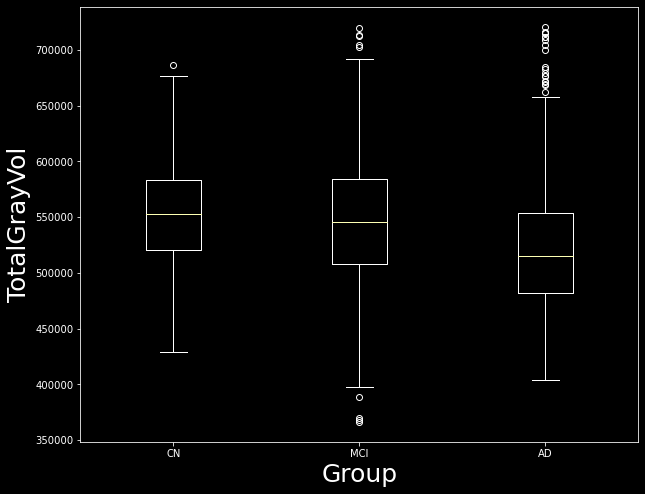

In [61]:
make_box_plot(all_merged, 'Group', 'TotalGrayVol')

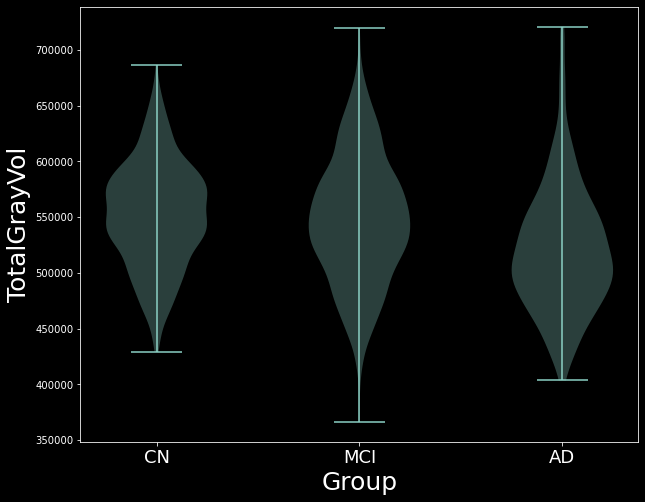

In [62]:
make_violin_plot(all_merged, 'Group', 'TotalGrayVol')

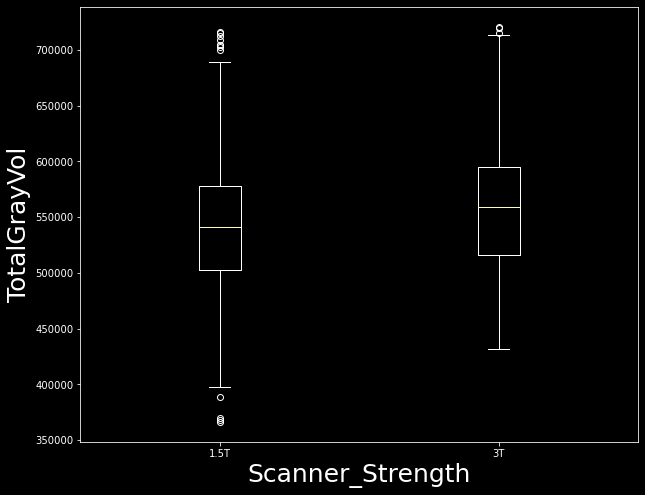

In [63]:
make_box_plot(all_merged, 'Scanner_Strength', 'TotalGrayVol')

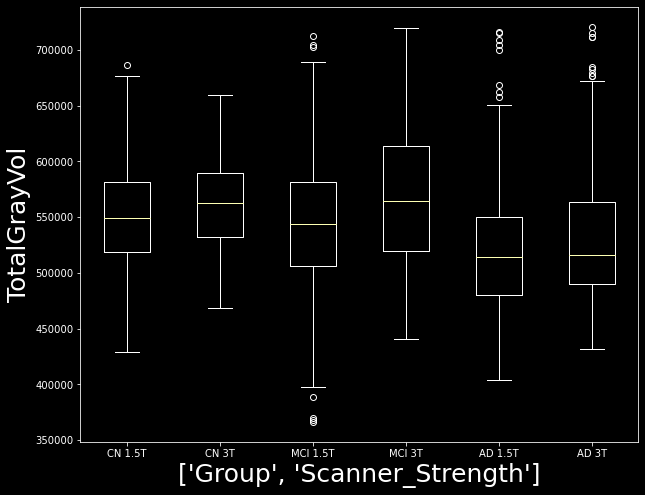

In [64]:
make_box_plot2x(all_merged, ['Group', 'Scanner_Strength'], 'TotalGrayVol')

make_box_plot2x(all_merged)

(array([ 65.,  86., 242., 260., 660., 887., 826., 534., 285.,  34.]),
 array([55. , 58.8, 62.6, 66.4, 70.2, 74. , 77.8, 81.6, 85.4, 89.2, 93. ]),
 <BarContainer object of 10 artists>)

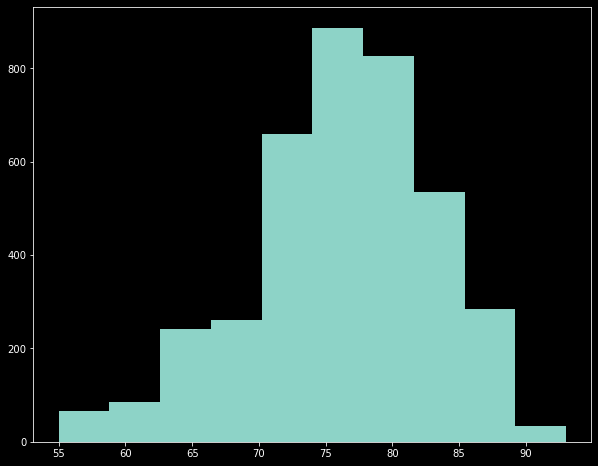

In [65]:
plt.hist(all_merged['Age'])

### Hippocampal Volume

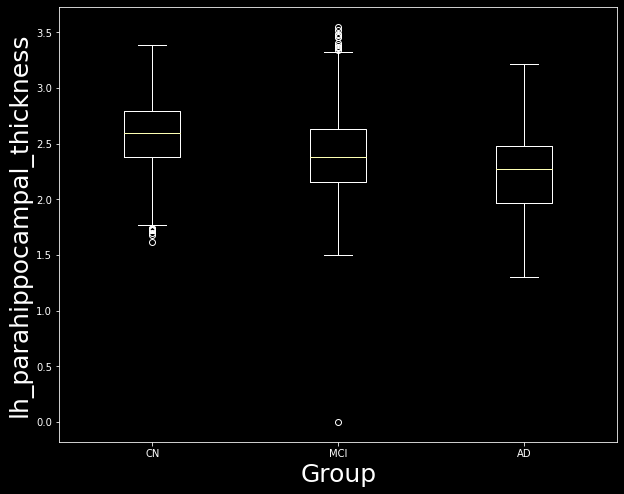

In [66]:
make_box_plot(all_merged, 'Group', 'lh_parahippocampal_thickness')

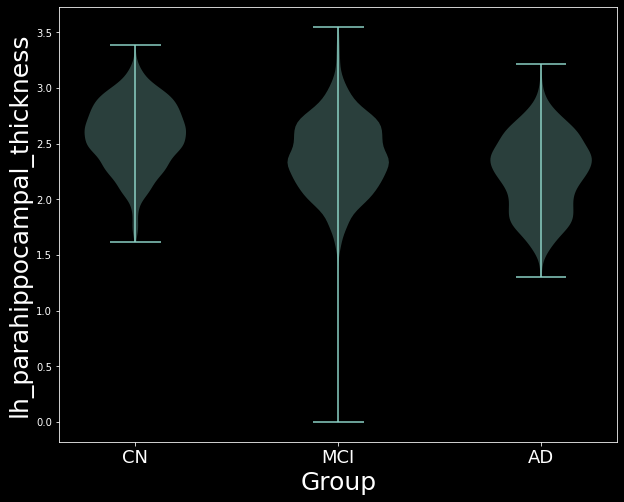

In [67]:
make_violin_plot(all_merged, 'Group', 'lh_parahippocampal_thickness')

In [68]:
# make_violin_plot(all_merged, 'Group', 'rh_parahippocampal_thickness')

In [69]:
# make_violin_plot(all_merged, 'Group', 'Left_Hippocampus')

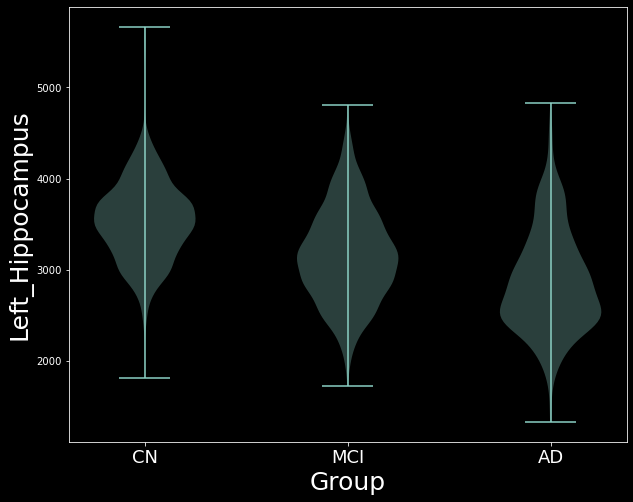

In [70]:
make_violin_plot(all_merged, 'Group', 'Left_Hippocampus')

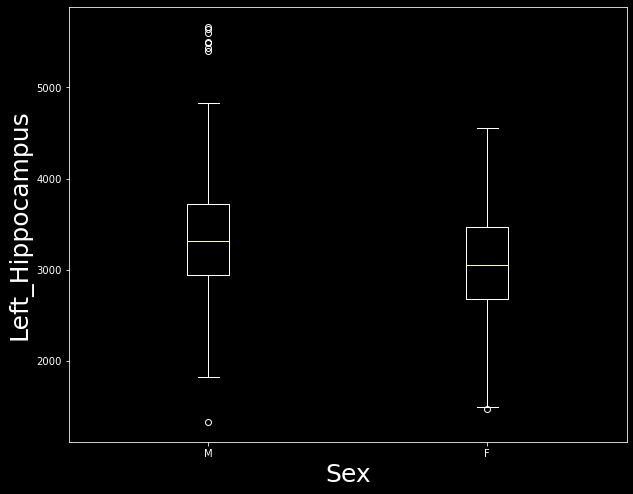

In [71]:
make_box_plot(all_merged, 'Sex', 'Left_Hippocampus')

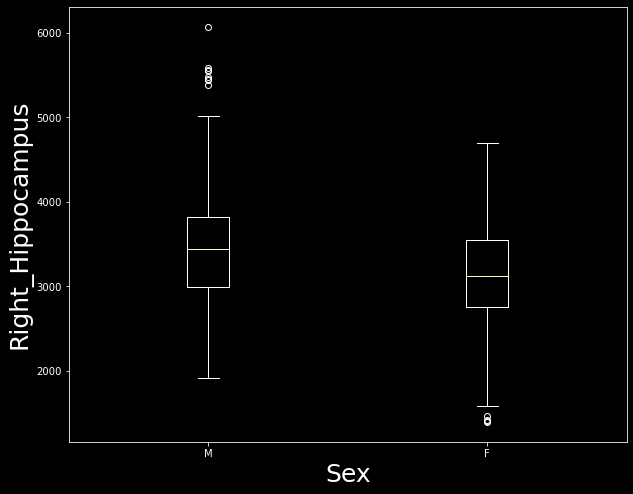

In [72]:
make_box_plot(all_merged, 'Sex', 'Right_Hippocampus')

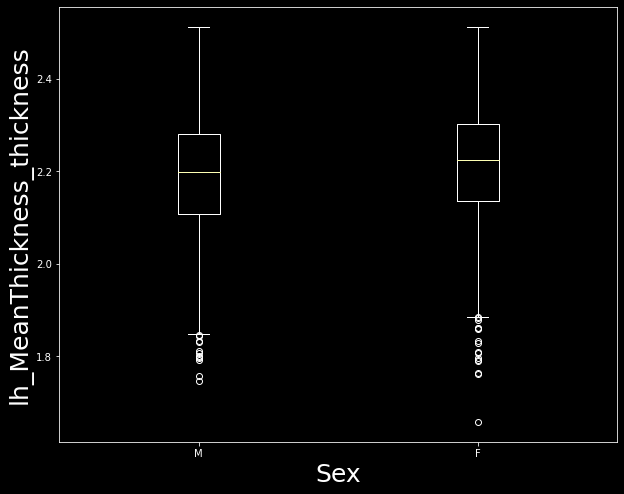

In [73]:
make_box_plot(all_merged, 'Sex', 'lh_MeanThickness_thickness')

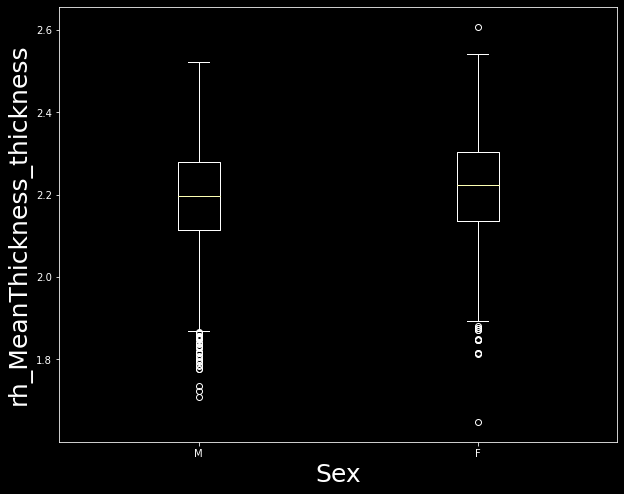

In [74]:
make_box_plot(all_merged, 'Sex', 'rh_MeanThickness_thickness')

In [75]:
def make_box_plot(df, x, y):
    '''Creates a simple box plot for data in a dataframe. x should be discrete, y continuous'''
    xkeys = df[x].unique()
    data=[]
    for key in xkeys:
        data.append(df[df[x] == key][y])
    plt.boxplot(data, labels=xkeys)
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)

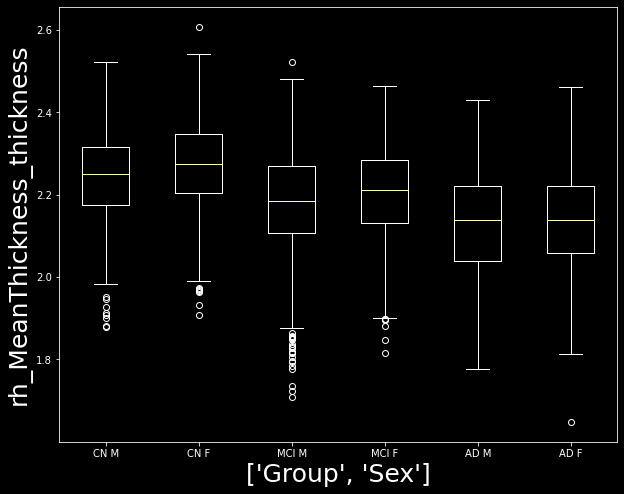

In [76]:
make_box_plot2x(all_merged, ['Group', 'Sex'], 'rh_MeanThickness_thickness')

In [77]:
# all_merged

In [78]:
# all_merged.to_csv('all_imaging.csv')

In [79]:
# list(all_merged.columns)